# Introduction
- KaggleのNMRコンペ(https://www.kaggle.com/c/champs-scalar-coupling/data)

# Let's import everything I nead :)

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Data Preparation

**check datasets**

In [2]:
dir_data = './data/champs-scalar-coupling/'
path_list = glob.glob(dir_data + '*')
path_list

['./data/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './data/champs-scalar-coupling/structures.csv',
 './data/champs-scalar-coupling/mulliken_charges.csv',
 './data/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './data/champs-scalar-coupling/train.csv',
 './data/champs-scalar-coupling/structures',
 './data/champs-scalar-coupling/test.csv',
 './data/champs-scalar-coupling/sample_submission.csv',
 './data/champs-scalar-coupling/dipole_moments.csv',
 './data/champs-scalar-coupling/potential_energy.csv']

**load csv**

In [3]:
path = './data/champs-scalar-coupling/scalar_coupling_contributions.csv'
df = pd.read_csv(path)

# Pandas Plofiling

In [4]:
pdp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling bac

Number of variables,8
Number of observations,4658147
Total Missing (%),0.0%
Total size in memory,284.3 MiB
Average record size in memory,64.0 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# EDA
- null なし

---

## Basics

In [5]:
df.head(5)

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


In [6]:
df.tail(5)

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
4658142,dsgdb9nsd_133884,17,4,2JHC,3.586440,0.019741,0.150477,-0.213205
4658143,dsgdb9nsd_133884,17,5,3JHC,0.674583,-0.007276,0.305078,-0.403388
4658144,dsgdb9nsd_133884,17,6,3JHC,1.337470,-0.028423,0.312240,-0.447920
4658145,dsgdb9nsd_133884,17,7,2JHC,4.800620,0.139202,-0.053102,-0.124710
4658146,dsgdb9nsd_133884,17,8,1JHC,115.975000,0.378277,0.450213,1.130600


In [8]:
df.isnull().sum(axis=0)

molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
fc               0
sd               0
pso              0
dso              0
dtype: int64

## Plot

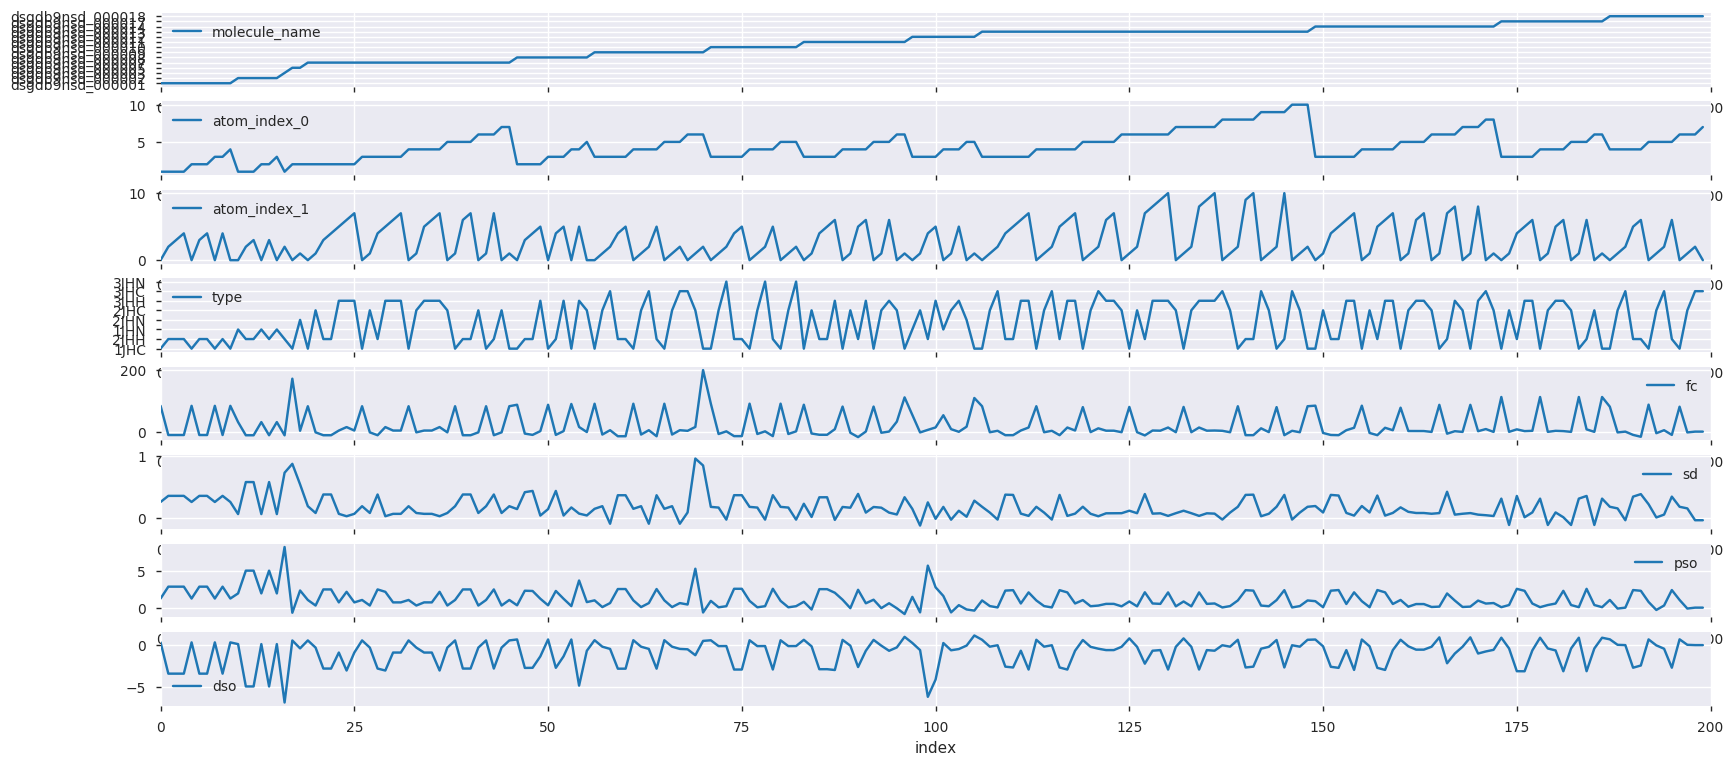

In [9]:
df_small = df.iloc[0:200,:]
fig, axs = plt.subplots(len(df_small.columns),1, figsize=(20, 9))
axs = axs.ravel()
for i in range(len(df_small.columns)):
    if df.iloc[0, i] == str:
        break
    axs[i].set_xlim(0, 200)
    axs[i].plot(df_small.iloc[:,i], label=df_small.columns[i])
    axs[i].set_xlabel('index')
    axs[i].legend()

--->この数は、dipole_moments のときの、molecule_name 数と一緒
---> molecule の数は、85003個と考えてよさそう

--->この数は、dipole_moments のときの、molecule_name 数と一緒
---> molecule の数は、85003個と考えてよさそう

## 相関見てみる

**pair plot**

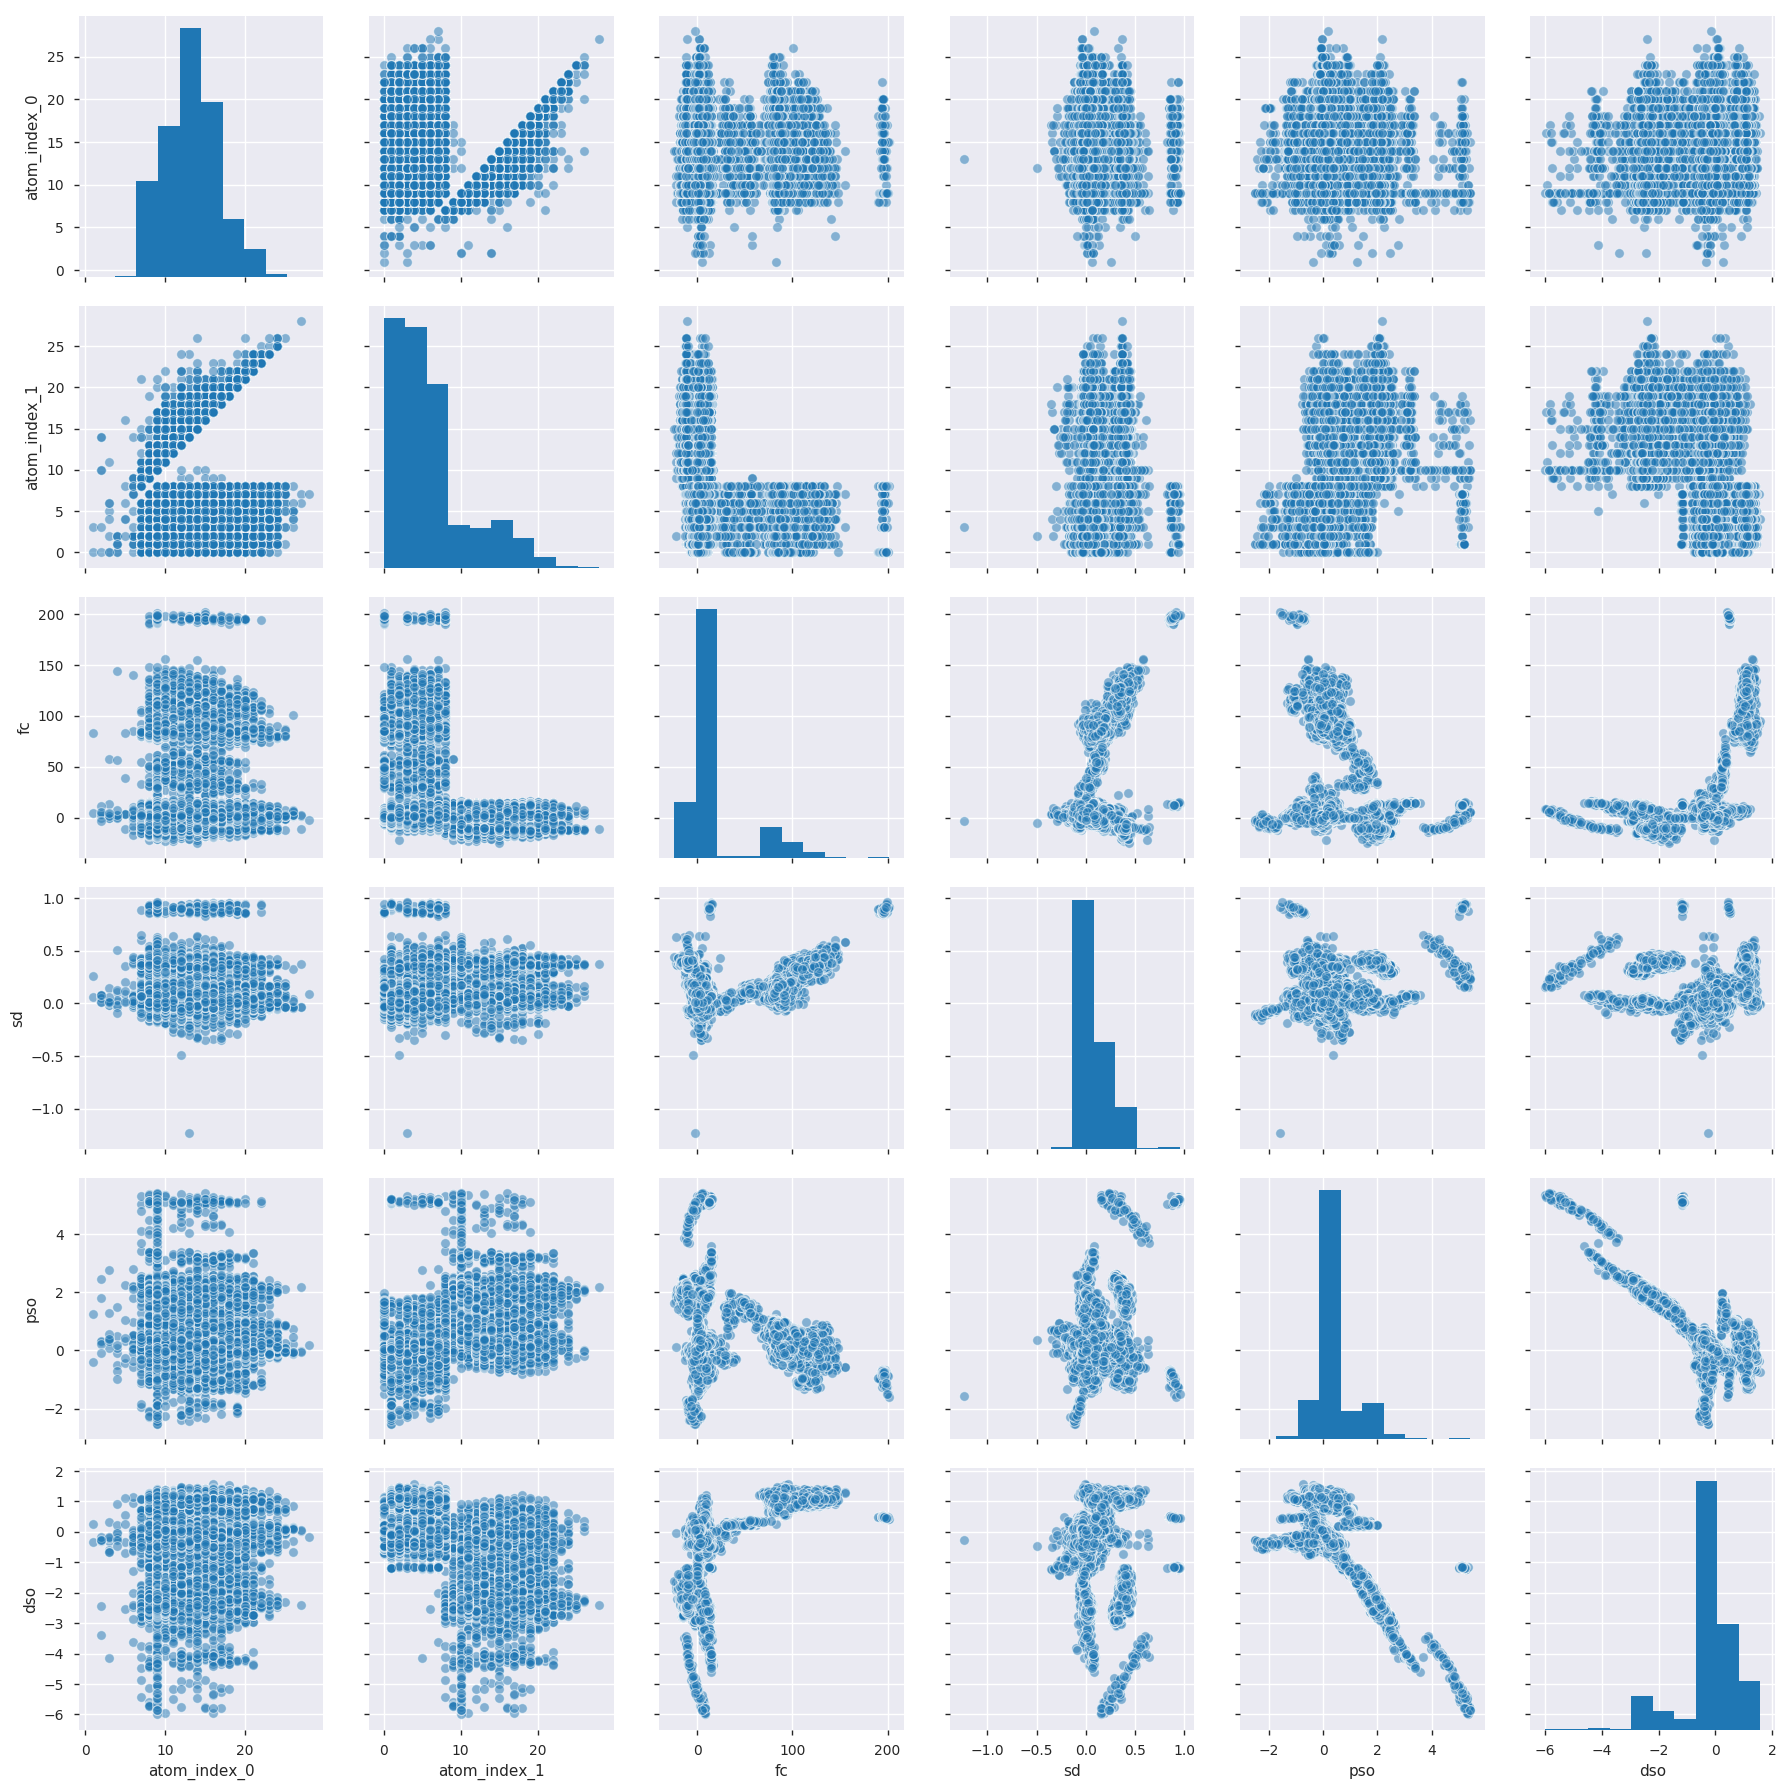

In [10]:
sns.pairplot(df.iloc[::100, :], height=3, plot_kws=dict(alpha=0.5))

---> これは...ほとんど独立な分布ですね

**heat map**

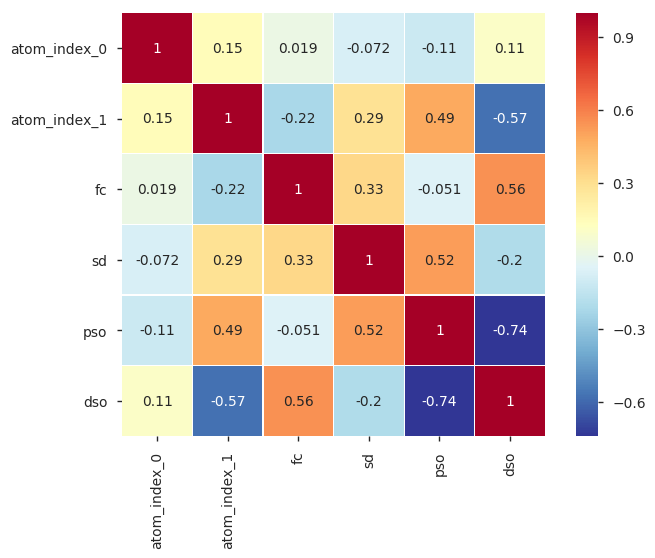

In [11]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='RdYlBu_r', linecolor='white', annot=True)